# 概要

グラフィカルモデルは、確率変数同士の依存関係を「グラフ（ノードとエッジ）」として表現する枠組み

## 分類

エッジに方向があるかどうかで大別される。
DAGはさらに時系列要素を考慮するかどうかで別れる

- 有向グラフィカルモデル（ベイジアンネットワーク、有向非巡回グラフ、DAG）
    - 静的モデル（時系列を考慮しない）
    - 動的モデル（時系列あり）
- 無向グラフィカルモデル


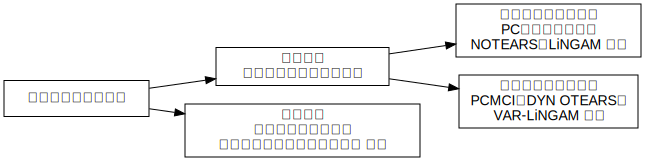

In [4]:
import graphviz

graphviz.Source("""
digraph G {
    rankdir=LR;
    node [shape=box, fontname="Helvetica"];

    GraphicalModel   [label="グラフィカルモデル"];
    Directed         [label="方向あり\nベイジアンネットワーク"];
    Static           [label="静的（時系列なし）\nPCアルゴリズム、\nNOTEARS、LiNGAM など"];
    Dynamic          [label="動的（時系列あり）\nPCMCI、DYN OTEARS、\nVAR-LiNGAM など"];

    Undirected       [label="方向なし\nボルツマンマシン、\nマルコフランダムフィールド など"];

    // edges
    GraphicalModel -> Directed;
    GraphicalModel -> Undirected;

    Directed -> Static;
    Directed -> Dynamic;

    Undirected;
}

""")

## ベイジアンネットワーク（有向非巡回グラフ, DAG）

- ノード：確率変数
- 有向エッジ：原因 → 結果 の方向を示す
- サイクル（循環）は持たない（DAG: Directed Acyclic Graph）

という構造を持つ確率モデル

また、全体の確率分布を条件付き確率の積で表せる。（例：$P(X,Y,Z)=P(X)P(Y∣X)P(Z∣Y)$）

:::{admonition} 定義

$V$ をノードの集合 $\{X_1, X_2, \ldots, X_n\}$、$E$ をエッジの集合とする。このとき、双方向矢線のない非巡回的有向グラフ $G = (V, E)$ が、$V = \{X_1, X_2, \ldots, X_n\}$ の同時分布のグラフ $G$ に従う逐次的因数分解の形、すなわち

$$
P(X_1, X_2, \ldots, X_n) = \prod_{i=1}^n P(X_i \mid pa(X_i))
$$

の形に規定するとき、このグラフ $G$ をベイジアンネットワークという（Pearl 2009, 黒木 2015）。

:::


ここで $pa(X_i)$ は $X_i$ の直接の原因（親、parent）となる変数の集合を意味する。（例えば$X_p \to X_i$という関係なら、$X_p \in pa(X_i)$


## 構造因果モデル

(構造)因果モデルでは、因果関係を決定論的な関数方程式で表す。確率的な要因は誤差$\varepsilon_i$に起因すると考える。

$$
X_i=f_i\left(p a\left(X_i\right), \varepsilon_i\right)\quad i=1, \ldots, n
$$



## 因果ダイアグラム

構造因果モデルを描いたグラフを因果ダイアグラムと呼ぶ。



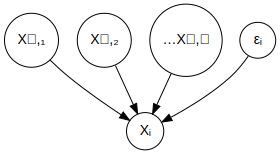

In [9]:
import graphviz

graphviz.Source("""
digraph G {
    rankdir=TB;
    node [shape=circle, fontname="Helvetica"];

    // 親ノード群
    Xp1   [label="Xₚ,₁"];
    Xp2   [label="Xₚ,₂"];
    Xpn   [label="…Xₚ,ₙ"];

    // 誤差項
    Ei    [label="εᵢ"];

    // 子ノード
    Xi    [label="Xᵢ"];

    // 親 → 子
    Xp1 -> Xi;
    Xp2 -> Xi;
    Xpn -> Xi;

    // 誤差項 → 子
    Ei -> Xi;

    // レイアウト調整
    { rank=same; Xp1; Xp2; Xpn; Ei }
}
""")